In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#mudar versão
#!pip install pandas=='0.21.0'

In [3]:
dados = pd.read_csv('Curso_de_Estatistica/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


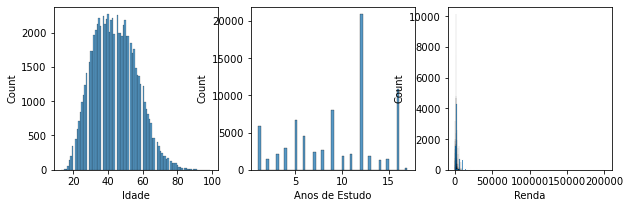

In [4]:
lista = dados.columns[[2,4,5]]


plt.figure(figsize=(10,3))
for posicao, nome in enumerate(lista):
    plt.subplot(1, 3, posicao + 1)
    
    if nome == 'Renda':
        sns.histplot(dados['Renda'][dados['Renda'] < 10000])
        
    sns.histplot(dados[nome])

In [5]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [6]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [7]:
sorted(dados['Sexo'].unique())

[0, 1]

In [8]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

In [9]:
np.sqrt(dados['Idade'].var())

12.480583465360187

In [10]:
dados['Idade'].std()

12.480583465360187

<AxesSubplot:xlabel='Altura', ylabel='Count'>

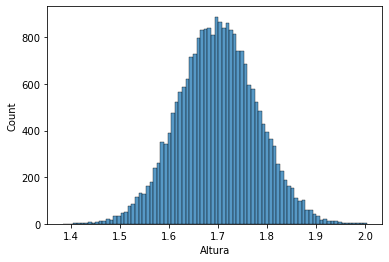

In [11]:
sns.histplot(dados['Altura'][dados['Sexo'] == 1])

<AxesSubplot:xlabel='Altura', ylabel='Count'>

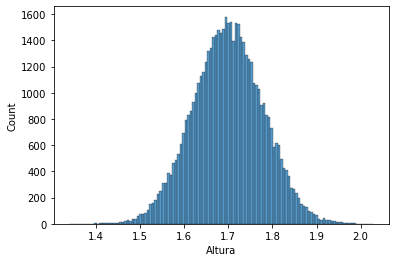

In [12]:
sns.histplot(dados['Altura'][dados['Sexo'] == 0])

### Análise descritiva dos dados 

#### Tabela de Frequência

In [13]:
frequencia  = dados['Sexo'].value_counts()

In [14]:
percentual = round(dados['Sexo'].value_counts(normalize = True) * 100, 2)

In [15]:
dist_freq_qualitativa = pd.DataFrame({
    'Frequencia': frequencia,
    'Percentual': percentual
})

In [16]:
dist_freq_qualitativa.rename(index = {
    0 : 'Masculino',
    1 : 'Feminimo'
}, inplace = True)

dist_freq_qualitativa

,Frequencia,Percentual
Masculino,53250,69.3
Feminimo,23590,30.7


In [17]:
sexo = {
    0 : 'Feminino',
    1 : 'Masculino'
}

cor = {
    0 : 'Indigena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
}


frequencia = pd.crosstab(dados.Sexo,
                  dados.Cor)

frequencia.rename(
    index = sexo,
    columns = cor,
    inplace = True
)

frequencia

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Feminino,256,22194,5502,235,25063
Masculino,101,9621,2889,117,10862


In [18]:
percentual = round(pd.crosstab(dados.Sexo,
                  dados.Cor,
                  normalize = True) * 100, 2)

percentual.rename(
    index = sexo,
    columns = cor,
    inplace = True
)

percentual

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Feminino,0.33,28.88,7.16,0.31,32.62
Masculino,0.13,12.52,3.76,0.15,14.14


##### Renda média por sexo e cor 

In [19]:
renda_cor = round(pd.crosstab(dados.Sexo,
                  dados.Cor,
                  aggfunc = 'mean',
                  values = dados.Renda), 2)

renda_cor.rename(
    index = sexo,
    columns = cor,
    inplace = True
)

renda_cor

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Feminino,1081.71,2925.74,1603.86,4758.25,1659.58
Masculino,2464.39,2109.87,1134.60,3027.34,1176.76


In [20]:
dados2 = pd.DataFrame({'Profissao': [1, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1, 3]})

index = {
    1: 'Estatístico',
    2: 'Cientista de Dados',
    3: 'Programador Python'
}

frequencia = dados2['Profissao'].value_counts()
percentual = dados2['Profissao'].value_counts(normalize = True) * 100

tabela = pd.DataFrame({
    'Frequência': frequencia,
    'Porcentual (%)': percentual
})

tabela.rename(index = index, inplace = True)
tabela.rename_axis('Profissão', axis = 'columns', inplace = True)
tabela

Profissão,Frequência,Porcentual (%)
Cientista de Dados,5,41.666667
Programador Python,4,33.333333
Estatístico,3,25.000000


#### Em variáveis contínuas

In [21]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [22]:
classes = [0, 1576, 3152, 7880, 15760, 2000000]
labels = ['E', 'D', 'C', 'B', 'A']

frequencia = pd.value_counts(pd.cut(x = dados.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True))

percentual = pd.value_counts(pd.cut(x = dados.Renda,
      bins = classes,
      labels = labels,
      include_lowest = True), normalize = True) * 100

dist_freq_quant = pd.DataFrame({
    'Frequencia': frequencia,
    'Percentual': percentual
}).sort_index(ascending=False)

dist_freq_quant

,Frequencia,Percentual
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [23]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia_al = pd.value_counts(pd.cut(x = dados.Altura,
      bins = classes,
      labels = labels,
      include_lowest = True))

percentual_al = pd.value_counts(pd.cut(x = dados.Altura,
      bins = classes,
      labels = labels,
      include_lowest = True), normalize = True) * 100

dist_freq_quant_al = pd.DataFrame({
    'Frequencia': frequencia_al,
    'Percentual': percentual_al
}).sort_index(ascending=True)

dist_freq_quant_al

,Frequencia,Percentual
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


##### Definindo o numero de classes

In [24]:
n = dados.shape[0]
n
k = 1 + (10/3) *np.log10(n)
int(round(k,0))

17

In [25]:
pd.value_counts(
    pd.cut(
    x = dados.Renda,
        bins = 17,
        include_lowest=True
    ),
    sort = False,
    normalize = True
)

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

<AxesSubplot:xlabel='Altura', ylabel='Density'>

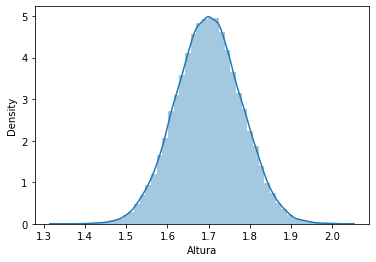

In [26]:
ax = sns.distplot(dados.Altura)
ax

In [27]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})


dataset.groupby(['Sexo']).mean()

,Idade
Sexo,
H,45.750000
M,46.333333


###### Distribuição

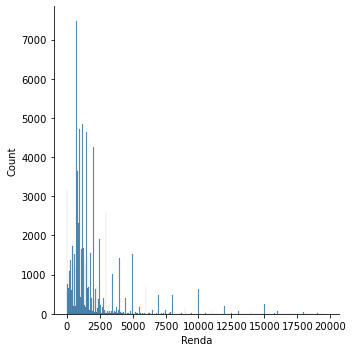

In [36]:
ax = sns.displot(dados.query('Renda < 20000').Renda)
ax

In [41]:
#moda < mediana < media -> simetrico a direita 
print(dados.Renda.mean())
print(dados.Renda.median())
print(dados.Renda.mode()[0])

2000.3831988547631
1200.0
788


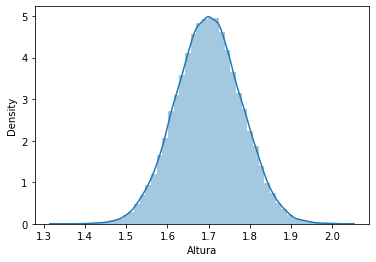

In [42]:
#Simetrico media = moda = mediana
ax = sns.distplot(dados.Altura)

<AxesSubplot:xlabel='Anos de Estudo', ylabel='Density'>

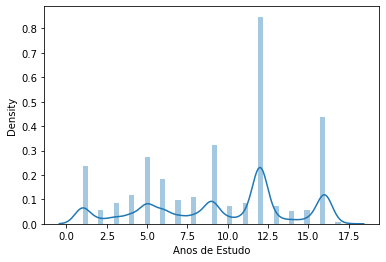

In [44]:
#Simetrico a esquerda
sns.distplot(dados['Anos de Estudo'])